# Scikit-Learn Basics

In [42]:
import numpy as np
from numpy.random import normal, seed, shuffle
import matplotlib.pyplot as plt

In [88]:
def shuffle_dataset(x, y):
    _, cols = x.shape
    dataset = np.c_[x, y]
    shuffle(dataset)
    xout, yout = dataset[:,:cols], dataset[:,cols]
    return xout, yout

In [190]:
seed(42)
X1 = normal(loc=-0.8, size=(100, 2))
X2 = normal(loc=+0.8, size=(100, 2))

train_x = np.r_[X1, X2]
train_y = np.r_[np.zeros(100), np.ones(100)]
train_x, train_y = shuffle_dataset(values, targets)

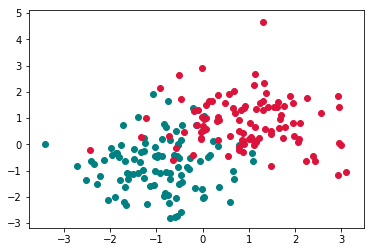

In [191]:
plt.scatter(*X1.T, color="teal")
plt.scatter(*X2.T, color="crimson")
plt.show()

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

lr = LogisticRegression()
lr.fit(values, targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
# Total precision on the training dataset
precision_score(targets, lr.predict(values))

0.88461538461538458

** The Confusion Matrix**

|   | F | T
|---| --- | ---
| **F** |TN | FP
| **T** | FN | TP

How well you predicted:
$$
    \text{Precision} = \frac{TP}{TP + FP}
$$

How *not* bad you missed:
$$
    \text{Recall} = \frac{TP}{TP + FN}
$$

The F1: Harmonic Mean
$$
    F_1 = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}
$$

In [203]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Prediction over cross-validated data
train_cv_pred = cross_val_predict(lr, train_x, train_y, cv=3)

In [204]:
confusion_matrix(train_y, train_cv_pred, labels=[0,1])

array([[88, 12],
       [ 8, 92]])

In [200]:
precision_score(train_y, train_cv_pred)

0.88461538461538458

In [201]:
recall_score(train_y, train_cv_pred)

0.92000000000000004

In [205]:
# Whereas the regular mean treats all values equally,
# the harmonic mean gives much more weight to low values.
f1_score(train_y, train_cv_pred)

0.90196078431372562

In [207]:
# Arithmetic Mean
(precision_score(train_y, train_cv_pred) + recall_score(train_y, train_cv_pred)) / 2

0.90230769230769226

We did better at *not* missing 1's than we did being sure it was 1, i.e., the model decided it was better to predict more 1's that weren't, rather than leaning towards a prediction of 0.

### Model on the test dataset

In [173]:
nsamp = 50
test_x = np.r_[normal(loc=-0.8, size=(nsamp, 2)),
             normal(loc=+0.8, size=(nsamp, 2)),]
test_y = np.r_[np.zeros(nsamp), np.ones(nsamp)]

test_x, test_y = shuffle_dataset(test_x, test_y)

In [183]:
# Total precision on the test dataset
test_predict = lr.predict(test_x)
precision_score(test_y, test_predict)

0.8035714285714286

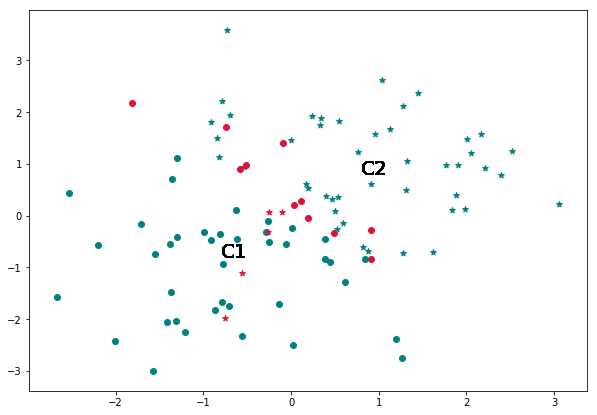

In [184]:
plt.figure(figsize=(10,7))
for row in np.c_[test_x, test_y, test_predict]:
    x1, x2, trueval, predval = row
    
    marker = "*" if trueval == 1 else "o"
    color = "teal" if trueval == predval else "crimson"
    
    plt.scatter(x1, x2, marker=marker, color=color)
    plt.text(-0.8, -0.8, "C1", fontsize=20)
    plt.text(0.8, 0.8, "C2", fontsize=20)

plt.show()